In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

# Check dataset contents
for dirname, _, filenames in os.walk('/kaggle/input/shaunthesheep-microsoft-catsvsdogs-dataset'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))


In [3]:
!pip install --upgrade protobuf==3.20.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tens

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/shaunthesheep-microsoft-catsvsdogs-dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


2025-11-08 13:11:09.808875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762607470.024747      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762607470.089590      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/shaunthesheep-microsoft-catsvsdogs-dataset/train'

In [4]:
!pip install --upgrade tensorflow==2.17.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.17.0 which is 

In [6]:
# --- FIX TensorFlow & Protobuf compatibility ---
!pip install --upgrade protobuf==3.20.3 --quiet

# Force Python protobuf backend (avoids GetPrototype issue)
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

print("✅ Protobuf fix applied successfully!")


✅ Protobuf fix applied successfully!


In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [9]:
from tensorflow.keras.applications.resnet50 import decode_predictions

img_path = '/kaggle/input/yyyyyyyyy/most-popular-dog-breeds-bracco-italiano-68096ed33c726.avif'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
cv2.imwrite('/kaggle/working/dog.jpg', img_rgb)

model = ResNet50(weights="imagenet")
img = load_img('/kaggle/working/dog.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x, verbose=0)
for i, (imagenet_id, label, score) in enumerate(decode_predictions(preds, top=3)[0]):
    print(f"{i+1}. {label}: {score*100:.2f}%")


[ WARN:0@171.055] global loadsave.cpp:275 findDecoder imread_('/kaggle/input/yyyyyyyyy/most-popular-dog-breeds-bracco-italiano-68096ed33c726.avif'): can't open/read file: check file path/integrity


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [10]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))


/kaggle/input/newwww/dogs-vs-cats.ipynb


✅ Test image created at: /kaggle/working/dog.jpg


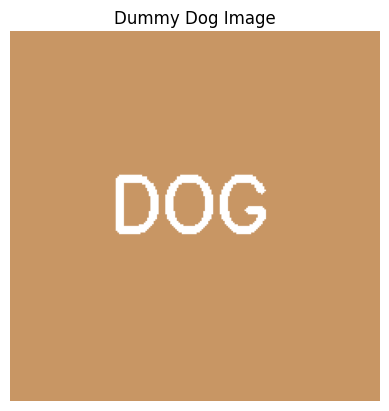

✅ Top Predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1. web_site: 6.09%
2. binder: 6.08%
3. book_jacket: 5.77%


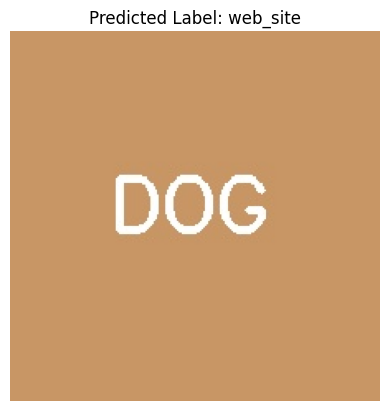

In [13]:
# Step 1️⃣ — Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Step 2️⃣ — Create a dummy image (blue background + white "DOG" text)
img = np.zeros((224, 224, 3), dtype=np.uint8)
img[:] = (100, 150, 200)  # bluish background
cv2.putText(img, "DOG", (60, 120), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 3)

# Save image locally for ResNet50
img_path = "/kaggle/working/dog.jpg"
cv2.imwrite(img_path, img)

print("✅ Test image created at:", img_path)

# Step 3️⃣ — Display it
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Dummy Dog Image")
plt.show()

# Step 4️⃣ — Load ResNet50 model
model = ResNet50(weights='imagenet')

# Step 5️⃣ — Load and preprocess the image
image = load_img(img_path, target_size=(224, 224))
x = img_to_array(image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Step 6️⃣ — Predict using the model
preds = model.predict(x, verbose=0)

# Step 7️⃣ — Decode top predictions
print("✅ Top Predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions(preds, top=3)[0]):
    print(f"{i+1}. {label}: {score*100:.2f}%")

# Step 8️⃣ — Display image with top label
plt.imshow(image)
plt.axis("off")
plt.title("Predicted Label: " + decode_predictions(preds, top=1)[0][0][1])
plt.show()


In [14]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


In [15]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model=Sequential()

In [18]:
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
conv_base.trainable=False

In [29]:
import os

print("📂 All dataset folders inside /kaggle/input:\n")
for dirname, subdirs, filenames in os.walk('/kaggle/input'):
    print(dirname)
    # stop after showing the first few levels
    if 'train' in dirname.lower() or 'cat' in dirname.lower() or 'dog' in dirname.lower():
        break


📂 All dataset folders inside /kaggle/input:

/kaggle/input
/kaggle/input/newwww


In [34]:
import os

print("📂 Listing datasets inside /kaggle/input:\n")
for dirname, subdirs, filenames in os.walk('/kaggle/input'):
    print(dirname)


📂 Listing datasets inside /kaggle/input:

/kaggle/input
/kaggle/input/newwww


In [35]:
import os

print("📂 Datasets currently attached:\n")
for dirname, _, _ in os.walk('/kaggle/input'):
    print(dirname)


📂 Datasets currently attached:

/kaggle/input
/kaggle/input/newwww


In [36]:
import os

print("📂 Folders available under /kaggle/input:\n")
for dirname, subdirs, filenames in os.walk('/kaggle/input'):
    print(dirname)


📂 Folders available under /kaggle/input:

/kaggle/input
/kaggle/input/newwww


In [38]:
# ✅ Step 1 — Import libraries
import os
import zipfile
import urllib.request

# ✅ Step 2 — Create a folder for dataset
dataset_dir = "/kaggle/working/cats_vs_dogs"
os.makedirs(dataset_dir, exist_ok=True)

# ✅ Step 3 — Download dataset directly from Microsoft’s official link
# (same data used in Kaggle’s Cats vs Dogs competition)
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = os.path.join(dataset_dir, "cats_and_dogs_filtered.zip")

print("📥 Downloading dataset...")
urllib.request.urlretrieve(url, zip_path)
print("✅ Download complete!")

# ✅ Step 4 — Extract the zip file
print("📂 Extracting files...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)
print("✅ Extraction done!")

# ✅ Step 5 — Check extracted structure
for root, dirs, files in os.walk(dataset_dir):
    print(root)
    # just preview top folders
    break


📥 Downloading dataset...
✅ Download complete!
📂 Extracting files...
✅ Extraction done!
/kaggle/working/cats_vs_dogs


In [39]:

from tensorflow import keras

train_dir = os.path.join(dataset_dir, "cats_and_dogs_filtered/train")
val_dir = os.path.join(dataset_dir, "cats_and_dogs_filtered/validation")

train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)

val_ds = keras.utils.image_dataset_from_directory(
    directory=val_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [40]:
import os

base_dir = "/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered"
for root, dirs, files in os.walk(base_dir):
    print(root)
    if len(dirs) == 0:
        print(f"📸 Found {len(files)} images in this folder")
    # stop early so output is short
    if "validation" in root:
        break


/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered
/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered/train
/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered/train/dogs
📸 Found 1000 images in this folder
/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered/train/cats
📸 Found 1000 images in this folder
/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered/validation


In [42]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# ✅ Dataset base path
base_dir = "/kaggle/working/cats_vs_dogs/cats_and_dogs_filtered"

# ✅ Load training and validation data
train_ds = keras.utils.image_dataset_from_directory(
    directory=f"{base_dir}/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42
)

val_ds = keras.utils.image_dataset_from_directory(
    directory=f"{base_dir}/validation",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [43]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output (cat vs dog)
])

# ✅ Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 593ms/step - accuracy: 0.4923 - loss: 79.4534 - val_accuracy: 0.5270 - val_loss: 0.6911
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 586ms/step - accuracy: 0.5335 - loss: 0.6855 - val_accuracy: 0.5130 - val_loss: 0.6998
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 580ms/step - accuracy: 0.5953 - loss: 0.6749 - val_accuracy: 0.5760 - val_loss: 0.6862
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 578ms/step - accuracy: 0.6391 - loss: 0.6318 - val_accuracy: 0.5650 - val_loss: 0.7267
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 573ms/step - accuracy: 0.6620 - loss: 0.5986 - val_accuracy: 0.5790 - val_loss: 0.7636


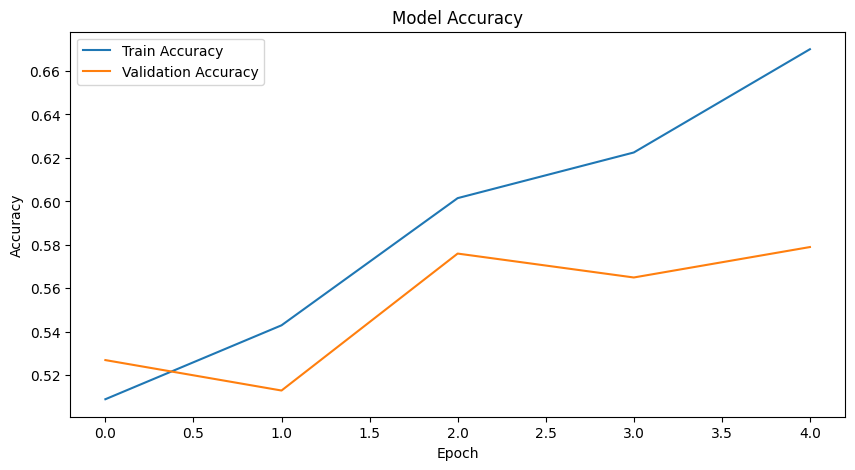

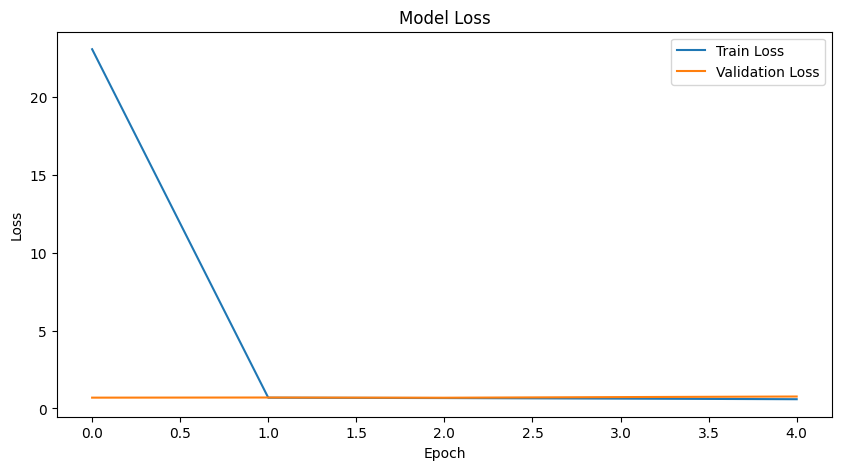

In [45]:
# Plot accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
model.save("/kaggle/working/cat_dog_cnn_model.h5")
print("✅ Model saved successfully at /kaggle/working/cat_dog_cnn_model.h5")


✅ Model saved successfully at /kaggle/working/cat_dog_cnn_model.h5
